In [1]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# import helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


/home/software/sloan/local/lib/py36/cryptography/hazmat/bindings/openssl/binding.py:163: CryptographyDeprecationWarning: OpenSSL version 1.0.1 is no longer supported by the OpenSSL project, please upgrade. A future version of cryptography will drop support for it.
  utils.CryptographyDeprecationWarning
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/software/sloan/local/lib/py36/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-7e489b57df84>", line 2, in <module>
    import tensorflow as tf
  File "/home/software/sloan/local/lib/tensorflow/cpu/py36/1.9.0/tensorflow/__init__.py", line 22, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "/home/software/sloan/local/lib/tensorflow/cpu/py36/1.9.0/tensorflow/python/__init__.py", line 82, in <module>
    from tensorflow.python.estimator import estimator_lib as estimator
  File "/home/software/sloan/local/lib/tensorflow/cpu/py36/1.9.0/tensorflow/python/estimator/estimator_lib.py", line 41, in <module>
    from tensorflow.python.estimator.inputs import inputs
  File "/home/software/sloan/local/lib/tensorflow/cpu/py36/1.9.0/tensorflow/python/estimator/inputs/inputs.py", line 22, in <module>
    from te

TypeError: attr() got an unexpected keyword argument 'type'

In [2]:
import logging
from pathlib import Path
import sys

# Setup logging
Path('tf_logs').mkdir(exist_ok=True)
tf.logging.set_verbosity(logging.INFO)
handlers = [
    #logging.FileHandler('tf_logs/main.log'),
    logging.StreamHandler(sys.stdout)
]
logging.getLogger('tensorflow').handlers = handlers


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/software/sloan/local/lib/py36/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-d08c2fda83de>", line 7, in <module>
    tf.logging.set_verbosity(logging.INFO)
NameError: name 'tf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/software/sloan/local/lib/py36/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/software/sloan/local/lib/py36/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/software/sloan/local/lib/py36/IPython/core/ultratb.py",

NameError: name 'tf' is not defined

In [57]:
# check if node has gpu or cpu
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
# Runs the op.
options = tf.RunOptions(output_partition_graphs=True)
metadata = tf.RunMetadata()
c_val = sess.run(c, options=options, run_metadata=metadata)

print(metadata.partition_graphs)

[node {
  name: "MatMul_4"
  op: "Const"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\260A\000\000\340A\000\000DB\000\000\200B"
      }
    }
  }
}
node {
  name: "_retval_MatMul_4_0_0"
  op: "_Retval"
  input: "MatMul_4"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "index"
    value {
      i: 0
    }
  }
}
library {
}
versions {
  producer: 26
}
]


## Checking TF 
https://www.tensorflow.org/tutorials/keras/basic_classification/


In [58]:
print(tf.__version__)

1.9.0-rc1


In [18]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [24]:
# scale color values between 0 and 1 by dividing by 255
train_images = train_images / 255.0

test_images = test_images / 255.0


In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

    Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
    Optimizer —This is how the model is updated based on the data it sees and its loss function.
    Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training the neural network model requires the following steps:

    Feed the training data to the model—in this example, the train_images and train_labels arrays.
    The model learns to associate images and labels.
    We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [33]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.4899 - acc: 0.8293
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3711 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.3346 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3111 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2923 - acc: 0.8914


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 22us/step
Test accuracy: 0.8719


# RUN MultiLayer Classification Exercise on Patent Dataset 

* load patent data (no NLP) vector learned
* load into using tensorflow using pandas helper function
* structure NN with dense layers

# #import keras-pandas library
### with tf.estimator class, can use pandas input function, but here I want to build a custom class, I want something that is flexible
`
https://towardsdatascience.com/elmo-embeddings-in-keras-with-tensorflow-hub-7eb6f0145440
https://keras.io/getting-started/sequential-model-guide/#mlp-for-binary-classification
https://github.com/strongio/keras-elmo/blob/master/Elmo%20Keras.ipynb
https://github.com/allenai/bilm-tf/issues/73
https://github.com/strongio/keras-elmo/blob/master/Elmo%20Keras.ipynb
https://tfhub.dev/google/elmo/2
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

## Look at the metrics available from tensor flow output
## Also how to balance classes pre tensor
# generate and output with a combo of dense networks
# once feel comfortable with that add in GLOVE embeddings
# then build a pipeline so data does not have to be stored in memory (a generator)

In [59]:
v6 = pd.read_pickle(
    '/pool001/lraymond/processed_data/pre_analysis_dfs/standardized_linear_classifier_df.p')

In [60]:
v6.head()

,description_word_count,lawyer_total_num_assignees,lawyer_total_num_inventors,lawyer_total_num_patents,max_dependent_claim,max_independent_claim,max_reference_sequence,min_reference_sequence,inventor_total_num_patents,number_assignees,...,flag_has_references,missing_citations_made,missing_patent_abstract,missing_patent_title,10_year_cites,10_year_cites_top1,10_year_cites_top10,10_year_cites_top50,10_year_cites_top75,10_year_cites_above0
patent_number,,,,,,,,,,,,,,,,,,,,,
4490860,-0.065373,-0.387168,-0.376298,-0.369129,0.0,-0.582795,-0.190683,0.0,-0.377771,0.492818,...,0,0,0,0,2,0,0,0,1,1
4490861,-0.490310,-0.430370,-0.374976,-0.392024,0.0,-0.416855,-0.190683,0.0,-0.172345,-1.785794,...,0,0,0,0,3,0,0,0,1,1
4490864,-0.946594,-0.144158,-0.320458,-0.299371,0.0,-0.333884,-0.190683,0.0,-0.377771,-1.785794,...,0,0,0,0,5,0,0,0,1,1
4490868,-0.500759,-0.435770,-0.367377,-0.372349,0.0,-0.499825,-0.190683,0.0,-0.120988,0.492818,...,0,0,0,0,1,0,0,0,0,1
4490876,-0.048828,-0.346666,-0.335657,-0.317973,0.0,-0.084973,-0.190683,0.0,-0.377771,-1.785794,...,0,0,0,0,1,0,0,0,0,1


In [65]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import sklearn

In [66]:
output_col = '10_year_cites_top1'

In [67]:
print(output_col)
    # Y_col = ['10_year_cites_top1']
Y_col = output_col
X_cols = [c for c in v6.columns if '_cites' not in c]

# print(sorted(X_cols))
rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)
    
# If I want to control to contrast group, I select on the 10 year cites values column
    # print(np.any(np.logical_and(mask_control, mask_target)))

X = v6[X_cols].as_matrix()
Y = v6[Y_col]
# (X[ind]==X_resampled).all() should be True
X_resampled, y_resampled, ind = rus.fit_resample(X, Y)
print(X_resampled.shape, y_resampled.shape, y_resampled.mean())
    
X_train, X_test, y_train, y_test, pat_nums_train, pat_nums_test = sklearn.model_selection.train_test_split(
    X_resampled, y_resampled, ind, random_state=0, shuffle=True)

10_year_cites_top1
(3854, 166) (3854,) 0.5


In [169]:
import keras
#from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [183]:
#Initializing Neural Network
classifier = keras.models.Sequential()
INPUT_DIM = X_train.shape[1]
print(INPUT_DIM)
SEED = 10
DROPOUT_RATE = 0.5

# Adding the input layer and the first hidden layer
classifier.add(Dense(32, kernel_initializer="normal", activation='sigmoid', use_bias=True, input_shape=(INPUT_DIM,)))
# now the model will take as input arrays of shape (*, INPUT_DIM)
# and output arrays of shape (*, 32)

#classifier.add(Dropout(rate=DROPOUT_RATE, seed=SEED))
classifier.add(BatchNormalization())
# after the first layer, you don't need to specify
# the size of the input anymore:
# Adding the second hidden layer
classifier.add(Dense(64, kernel_initializer="normal", activation='relu', use_bias=True))
classifier.add(BatchNormalization())
#classifier.add(Dropout(rate=DROPOUT_RATE, seed=SEED))

# after the first layer, you don't need to specify
# the size of the input anymore:
# Adding the second hidden layer
classifier.add(Dense(64, kernel_initializer="normal", activation='relu', use_bias=True))
classifier.add(BatchNormalization())
#classifier.add(Dropout(rate=DROPOUT_RATE, seed=SEED))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

# This is NLL 
classifier.compile(loss='binary_crossentropy',
                   # RMSProp algorithm - momentum, gradient moving average andbias correction 
              optimizer='rmsprop',
              metrics=['accuracy'])



166


In [184]:
# An epoch is one iteration over the entire input data 
# validation_data=(val_data, val_labels))
# hen prototyping a model, you want to easily monitor its performance on some validation data. 
# Passing this argument—a tuple of inputs and labels—allows the model to display the loss and metrics
# in inference mode for the passed data, at the end of each epoch
classifier.fit(X_train, y_train,
          epochs=20,
          batch_size=128)


Epoch 1/20
2890/2890 [==============================] - 1s 496us/step - loss: 0.6153 - acc: 0.6734
Epoch 2/20
2890/2890 [==============================] - 0s 26us/step - loss: 0.5177 - acc: 0.7474
Epoch 3/20
2890/2890 [==============================] - 0s 26us/step - loss: 0.4811 - acc: 0.7630
Epoch 4/20
2890/2890 [==============================] - 0s 27us/step - loss: 0.4688 - acc: 0.7830
Epoch 5/20
2890/2890 [==============================] - 0s 27us/step - loss: 0.4427 - acc: 0.7945
Epoch 6/20
2890/2890 [==============================] - 0s 27us/step - loss: 0.4318 - acc: 0.8021
Epoch 7/20
2890/2890 [==============================] - 0s 27us/step - loss: 0.4152 - acc: 0.8107
Epoch 8/20
2890/2890 [==============================] - 0s 28us/step - loss: 0.3952 - acc: 0.8194
Epoch 9/20
2890/2890 [==============================] - 0s 26us/step - loss: 0.3810 - acc: 0.8322
Epoch 10/20
2890/2890 [==============================] - 0s 27us/step - loss: 0.3675 - acc: 0.8436
Epoch 11/20
2890/2

In [185]:
classifier.evaluate(X_test, y_test)

964/964 [==============================] - 0s 343us/step


[0.7016636590739999, 0.6981327800829875]

In [186]:
y_hat_classes = classifier.predict_classes(X_test)

In [187]:
cm1 = sklearn.metrics.confusion_matrix(y_test, y_hat_classes)

In [188]:
print('Confusion Matrix : \n', cm1)
# Cij is number of observations known to be in group i but predicted to be in group j
# (0,0) is predicted to be in group 0 and actually in group 0
# (1,0) predictedto be in top 1, but actually in 0
# (0,1) predicted to be NOT top 1, but actually in top 1
# (1,1) predicted to be in top 1 and actually in top 1

Confusion Matrix : 
 [[276 213]
 [ 78 397]]


In [189]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm =  sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    classes_in_data = np.array(classes)[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes_in_data, yticklabels=classes_in_data,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Normalized confusion matrix
[[0.56 0.44]
 [0.16 0.84]]


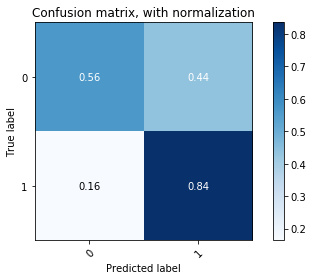

In [190]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_hat_classes, classes=['0', '1'], normalize=True,
                      title='Confusion matrix, with normalization')


plt.show()


In [191]:
# plot ROC curve of the model

In [192]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
INPUT_DIM = X_train.shape[1]
print(INPUT_DIM)
SEED = 10
DROPOUT_RATE = 0.5

In [207]:
def build_sigmoid_relu_relu_NN(input_dim):
    classifier = keras.models.Sequential()
    classifier.add(
        Dense(128, kernel_initializer="normal", activation='sigmoid', use_bias=True, input_shape=(INPUT_DIM,)))
    classifier.add(BatchNormalization())
    classifier.add(Dense(128, kernel_initializer="normal", activation='relu', use_bias=True))
    classifier.add(BatchNormalization())
    classifier.add(Dense(128, kernel_initializer="normal", activation='relu', use_bias=True))
    classifier.add(BatchNormalization())
    classifier.add(Dense(1, activation='sigmoid'))
    # compile layer
    classifier.compile(
        loss='binary_crossentropy',
                   # RMSProp algorithm - momentum, gradient moving average andbias correction 
              optimizer='rmsprop',
              metrics=['accuracy'])
    return classifier

In [208]:
k_model = build_sigmoid_relu_relu_NN(X_test.shape[1])

In [209]:
k_model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
2890/2890 [==============================] - 2s 565us/step - loss: 0.6396 - acc: 0.6893
Epoch 2/20
2890/2890 [==============================] - 0s 42us/step - loss: 0.5069 - acc: 0.7547
Epoch 3/20
2890/2890 [==============================] - 0s 41us/step - loss: 0.4641 - acc: 0.7785
Epoch 4/20
2890/2890 [==============================] - 0s 42us/step - loss: 0.4410 - acc: 0.7865
Epoch 5/20
2890/2890 [==============================] - 0s 42us/step - loss: 0.4110 - acc: 0.8138
Epoch 6/20
2890/2890 [==============================] - 0s 42us/step - loss: 0.3852 - acc: 0.8343
Epoch 7/20
2890/2890 [==============================] - 0s 43us/step - loss: 0.3695 - acc: 0.8349
Epoch 8/20
2890/2890 [==============================] - 0s 41us/step - loss: 0.3422 - acc: 0.8585
Epoch 9/20
2890/2890 [==============================] - 0s 42us/step - loss: 0.3252 - acc: 0.8578
Epoch 10/20
2890/2890 [==============================] - 0s 42us/step - loss: 0.3060 - acc: 0.8692
Epoch 11/20
2890/2

In [210]:
y_pred_keras = k_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = sklearn.metrics.roc_curve(y_test, y_pred_keras)

In [211]:
auc_keras = sklearn.metrics.auc(fpr_keras, tpr_keras)
print('AUC IS ', auc_keras)

AUC IS  0.7855429986007965


In [214]:
clf = sklearn.svm.SVC(kernel='sigmoid', probability=True, max_iter=5000)
svm_probs = clf.fit(X_train, y_train).predict_proba(X_test)
# Compute ROC curve and area the curve
fpr_svm, tpr_svm, thresholds_svm = sklearn.metrics.roc_curve(y_test, svm_probs[:, 1])

In [215]:
auc_svm = sklearn.metrics.auc(fpr_svm, tpr_svm,)
print('AUC IS ', auc_svm)

AUC IS  0.8209148638467335


In [217]:
def plot_competing_ROC(fpr_keras, tpr_keras, auc_keras, fpr_svm, tpr_svm, auc_svm):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Neural Net (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.3f})'.format(auc_svm))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

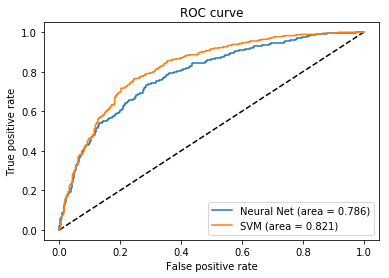

In [218]:
plot_competing_ROC(fpr_keras, tpr_keras, auc_keras, fpr_svm, tpr_svm, auc_svm)

In [229]:
# load text data associated with patents
import gzip
import pickle

TEXT_COLS =['missing_patent_abstract', 'missing_patent_title','flag_has_description_text', 'flag_has_independent_claim_text',
            'patent_abstract', 'patent_title']
TARGET = ['10_year_cites', '10_year_cites_top1']

In [226]:
def load_zipped_pickle(filename):
    # load a zipped compressed pickle file
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object
    
index_file = '/pool001/lraymond/patent_data/index_files/sample_pat_nums_all_numerical.gzip'

valid_patents2 = load_zipped_pickle(index_file)

valid_patents2 = valid_patents2.set_index('patent_number')

# here is where I would add in additional pieces of textual data if I wanted

v7 = pd.merge(
    v6, valid_patents2[['patent_abstract', 'patent_title']], left_index=True, right_index=True, how='inner')

del valid_patents2, txt_pats

print(v6.shape)
print(v7.shape)

v8_text = v7.loc[v7.missing_patent_abstract==0, :]
print(v8_text.shape)

In [267]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn import model_selection

rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)
Y_col = ['10_year_cites_top1']
X_cols_txt = ['patent_abstract', 'patent_title']
X_cols = [c for c in v6.columns if '_cites' not in c and c not in X_cols_txt]

In [276]:
# note here ind is not patent numbers but indices into array
X_resampled, y_resampled, ind = rus.fit_resample(v8_text[X_cols].as_matrix(), v8_text[Y_col].as_matrix())

In [278]:
X_resampled_text = v8_text[['patent_abstract']].as_matrix()[ind]

In [279]:
print(X_resampled_text.shape, X_resampled.shape, y_resampled.shape)

(3854, 1) (3854, 166) (3854, 1)


In [ ]:
X_txt = txt_pats[['patent_abstract']].as_matrix()
Y_txt = txt_pats[Y_col[0]].as_matrix()

X_train_txt, X_test_txt, y_train_txt, y_test, pat_nums_train, pat_nums_test = model_selection.train_test_split(
    X_resampled, y_resampled, ind, random_state=0, shuffle=True)


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import SVC

text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
    ('svc-sig', SVC(kernel='sigmoid', probability=True)),
])


text_clf.fit(X_train.reshape(-1,), y_train)

predicted = text_clf.predict(X_test.reshape(-1,))